In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
datasets = MNIST(root='data/',download=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 9042831.56it/s] 


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1196531.91it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26994954.55it/s]


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 2216982.28it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [3]:
len(datasets)

60000

In [4]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
datasets[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


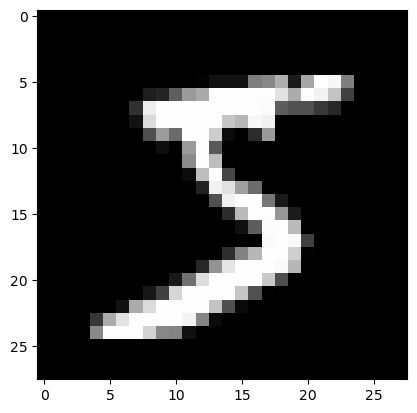

In [26]:
image, label = datasets[0]
plt.imshow(image,cmap='gray')
print('Label: ',label)

Label:  5


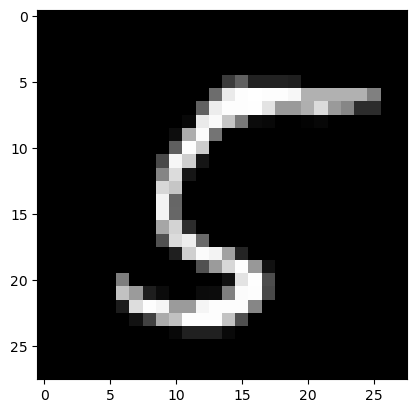

In [16]:
image, label = datasets[45360]
plt.imshow(image,cmap='gray')
print('Label: ',label)

In [17]:
import torchvision.transforms as transforms

In [18]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor()) 

In [22]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [23]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [38]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [39]:
from torch.utils.data import DataLoader
batch_size=128
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size) 

In [40]:
import torch.nn as nn

In [41]:
input_size = 28*28
num_classes = 10

#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [42]:
print(model.parameters)
print(model.weight.shape)
print(model.bias.shape)
print(model.weight,model.bias)

<bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>
torch.Size([10, 784])
torch.Size([10])
Parameter containing:
tensor([[ 0.0060,  0.0136, -0.0043,  ...,  0.0036,  0.0101,  0.0354],
        [ 0.0088,  0.0121, -0.0096,  ..., -0.0290, -0.0237,  0.0120],
        [ 0.0271,  0.0044,  0.0008,  ..., -0.0286, -0.0319, -0.0113],
        ...,
        [-0.0304, -0.0037,  0.0046,  ...,  0.0149,  0.0170,  0.0046],
        [ 0.0049, -0.0260, -0.0252,  ...,  0.0057,  0.0268, -0.0302],
        [-0.0100,  0.0028, -0.0249,  ..., -0.0161, -0.0022, -0.0142]],
       requires_grad=True) Parameter containing:
tensor([ 0.0023,  0.0160,  0.0305,  0.0190, -0.0350,  0.0190,  0.0021,  0.0347,
         0.0115, -0.0094], requires_grad=True)


In [45]:
#actually train_loader is interator.
for images, labels in train_loader:
    print(labels)
    print(images.shape) # (128,1,28,28)
    # images.reshape(128,784)
    print()
    outputs = model(images)
    break    

tensor([2, 8, 0, 9, 5, 0, 2, 9, 4, 5, 4, 9, 6, 2, 7, 9, 0, 0, 1, 4, 1, 1, 8, 3,
        0, 1, 7, 1, 1, 6, 5, 5, 6, 2, 7, 9, 7, 0, 2, 1, 0, 2, 8, 3, 5, 3, 1, 8,
        9, 0, 0, 5, 7, 2, 5, 2, 5, 7, 4, 0, 2, 1, 3, 7, 4, 9, 3, 7, 8, 8, 5, 4,
        5, 0, 0, 4, 7, 8, 4, 5, 1, 3, 0, 1, 9, 4, 3, 0, 4, 3, 1, 3, 1, 8, 7, 0,
        4, 3, 9, 2, 4, 9, 1, 9, 5, 7, 2, 8, 6, 5, 1, 9, 7, 8, 8, 2, 6, 2, 9, 1,
        4, 4, 0, 7, 7, 0, 6, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [65]:
import torch.nn.functional as F
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        #softmax along second dimension(column)
        out = F.softmax(out,dim=1)
        return out
    
model = MnistModel()

In [66]:
print(model.linear)
print(model.linear.weight.shape,model.linear.bias.shape)
print(list(model.parameters()))

Linear(in_features=784, out_features=10, bias=True)
torch.Size([10, 784]) torch.Size([10])
[Parameter containing:
tensor([[ 0.0319,  0.0277, -0.0188,  ..., -0.0143, -0.0307,  0.0178],
        [ 0.0322,  0.0248,  0.0061,  ..., -0.0297,  0.0139,  0.0162],
        [-0.0149,  0.0043,  0.0349,  ..., -0.0214, -0.0130,  0.0165],
        ...,
        [-0.0173, -0.0098,  0.0046,  ..., -0.0189,  0.0255, -0.0317],
        [ 0.0106,  0.0338, -0.0302,  ..., -0.0214, -0.0089, -0.0104],
        [ 0.0254,  0.0104, -0.0085,  ..., -0.0259, -0.0023, -0.0096]],
       requires_grad=True), Parameter containing:
tensor([-0.0062, -0.0091,  0.0235,  0.0199, -0.0136, -0.0028, -0.0177, -0.0233,
        -0.0233,  0.0162], requires_grad=True)]


In [70]:
for images,labels in train_loader:
    outputs = model(images)
    break

print('outputs shape: ',outputs.shape)
print('Sample outptus: \n',outputs[:2].data)

#Max along the 1st dimension columns (Row vector)
max_probs, preds = torch.max(outputs,dim=1)
print(preds)
print(max_probs)

outputs shape:  torch.Size([128, 10])
Sample outptus: 
 tensor([[0.1014, 0.0789, 0.0849, 0.1356, 0.0549, 0.0931, 0.0933, 0.1355, 0.1113,
         0.1111],
        [0.1367, 0.0595, 0.1086, 0.1309, 0.0757, 0.0705, 0.0945, 0.1142, 0.1278,
         0.0816]])
tensor([3, 0, 7, 1, 6, 7, 3, 7, 3, 8, 3, 3, 0, 3, 0, 8, 8, 8, 7, 7, 5, 7, 8, 3,
        8, 3, 7, 3, 7, 0, 7, 7, 5, 8, 3, 7, 3, 3, 0, 8, 3, 7, 5, 7, 7, 7, 3, 3,
        7, 7, 8, 0, 7, 7, 7, 2, 7, 3, 3, 3, 3, 3, 3, 8, 8, 7, 3, 7, 7, 7, 7, 7,
        3, 7, 8, 7, 7, 2, 3, 8, 0, 7, 7, 8, 7, 7, 8, 5, 3, 0, 7, 7, 7, 3, 8, 9,
        8, 8, 3, 3, 3, 7, 3, 7, 3, 7, 3, 1, 3, 3, 2, 7, 8, 7, 3, 7, 3, 8, 0, 3,
        3, 2, 7, 7, 7, 7, 7, 3])
tensor([0.1356, 0.1367, 0.1607, 0.1292, 0.1270, 0.1460, 0.1336, 0.1345, 0.1618,
        0.1166, 0.1304, 0.1416, 0.1433, 0.1596, 0.1379, 0.1381, 0.1426, 0.1588,
        0.1387, 0.1264, 0.1213, 0.1397, 0.1581, 0.1632, 0.1403, 0.1400, 0.1408,
        0.1553, 0.1430, 0.1305, 0.1230, 0.1406, 0.1339, 0.1401, 0.1560, 

In [71]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/ len(preds))

In [72]:
accuracy(outputs,labels)

tensor(0.0859)

In [74]:
#cross-entropy loss
loss_fn = F.cross_entropy
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3016, grad_fn=<NllLossBackward0>)


In [101]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer= opt_func(model.parameters(),lr)
    history = []

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

In [102]:
def evaluate(model,val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [108]:
#Final our model class code
import torch.nn.functional as F
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        #softmax along second dimension(column)
        # out = F.softmax(out,dim=1)
        return out
    
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc {:.4f}".format(epoch,result['val_loss'],result['val_acc']))

model = MnistModel()

In [104]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.3333866596221924, 'val_acc': 0.07634493708610535}

In [109]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9526, val_acc 0.6233
Epoch [1], val_loss: 1.6861, val_acc 0.7276
Epoch [2], val_loss: 1.4861, val_acc 0.7596
Epoch [3], val_loss: 1.3347, val_acc 0.7766
Epoch [4], val_loss: 1.2181, val_acc 0.7928


In [110]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1266, val_acc 0.8022
Epoch [1], val_loss: 1.0533, val_acc 0.8080
Epoch [2], val_loss: 0.9933, val_acc 0.8145
Epoch [3], val_loss: 0.9434, val_acc 0.8208
Epoch [4], val_loss: 0.9012, val_acc 0.8255


In [111]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8651, val_acc 0.8292
Epoch [1], val_loss: 0.8339, val_acc 0.8321
Epoch [2], val_loss: 0.8065, val_acc 0.8358
Epoch [3], val_loss: 0.7823, val_acc 0.8381
Epoch [4], val_loss: 0.7608, val_acc 0.8399


In [112]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7416, val_acc 0.8425
Epoch [1], val_loss: 0.7242, val_acc 0.8449
Epoch [2], val_loss: 0.7084, val_acc 0.8472
Epoch [3], val_loss: 0.6940, val_acc 0.8489
Epoch [4], val_loss: 0.6808, val_acc 0.8506


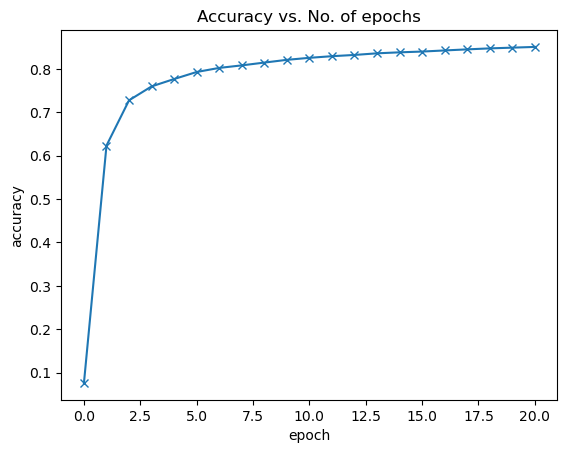

In [113]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Check on Test dataset 

In [114]:
test_dataset = MNIST(root='data/',train=False,transform=transforms.ToTensor())


Shape: torch.Size([1, 28, 28])
Label: 7


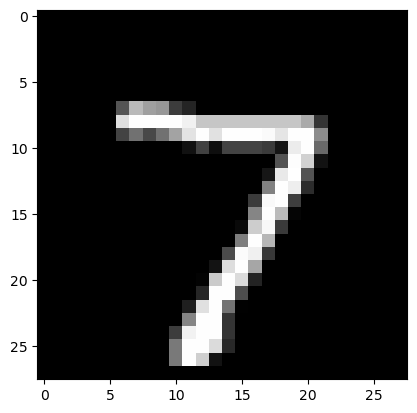

In [115]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [117]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()
#img.unsqueeze simply adds another dimension at the begining of the 1x28x28 tensor, 
#making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Label: 7 , Predicted: 7


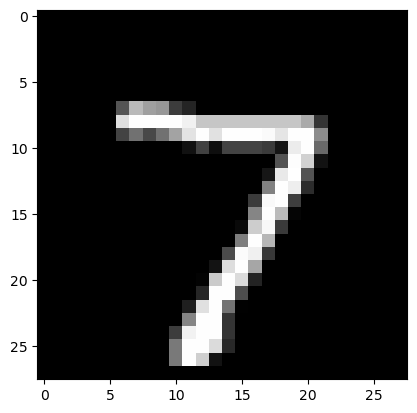

In [118]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


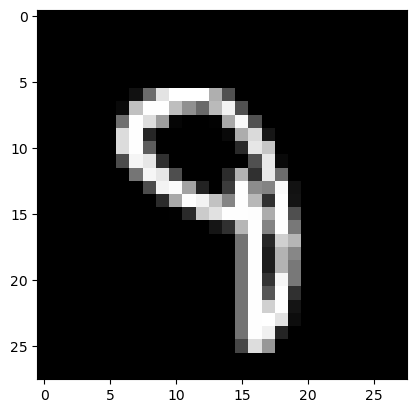

In [119]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


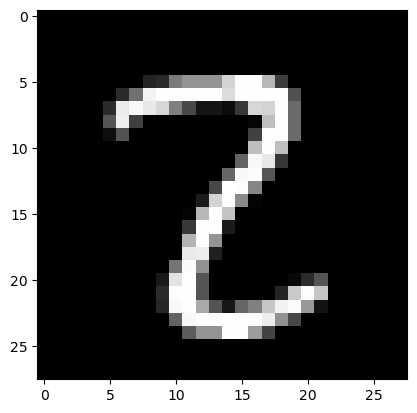

In [120]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [121]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.640834629535675, 'val_acc': 0.860644519329071}

In [123]:
#The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.
torch.save(model.state_dict(),'mnist-logistic.pth')

In [124]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0144, -0.0247, -0.0183,  ...,  0.0340,  0.0063, -0.0267],
                      [-0.0125, -0.0086, -0.0213,  ...,  0.0294,  0.0257,  0.0243],
                      [ 0.0188,  0.0257, -0.0202,  ...,  0.0262,  0.0057, -0.0072],
                      ...,
                      [ 0.0255,  0.0310, -0.0328,  ...,  0.0097,  0.0248,  0.0145],
                      [-0.0217, -0.0027,  0.0295,  ...,  0.0108,  0.0261,  0.0276],
                      [ 0.0180,  0.0047,  0.0181,  ...,  0.0236, -0.0168, -0.0085]])),
             ('linear.bias',
              tensor([-0.0340,  0.1120, -0.0094, -0.0540,  0.0168,  0.0343, -0.0126,  0.0584,
                      -0.1041, -0.0315]))])

In [126]:
model2 = MnistModel()
model2.state_dict()
#different weight then model1 now we want to take the weight of model1

OrderedDict([('linear.weight',
              tensor([[-0.0199,  0.0045,  0.0119,  ..., -0.0305,  0.0276, -0.0180],
                      [ 0.0355,  0.0012,  0.0031,  ..., -0.0343, -0.0209, -0.0324],
                      [-0.0076, -0.0100,  0.0113,  ...,  0.0082, -0.0200, -0.0051],
                      ...,
                      [-0.0101,  0.0264,  0.0199,  ...,  0.0084,  0.0122,  0.0336],
                      [ 0.0280,  0.0251,  0.0122,  ...,  0.0123,  0.0138, -0.0041],
                      [ 0.0016, -0.0252, -0.0063,  ...,  0.0193, -0.0027, -0.0270]])),
             ('linear.bias',
              tensor([-0.0122,  0.0050, -0.0039,  0.0101,  0.0198,  0.0244,  0.0317,  0.0322,
                      -0.0028,  0.0175]))])

In [128]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()
#same as earlier

OrderedDict([('linear.weight',
              tensor([[ 0.0144, -0.0247, -0.0183,  ...,  0.0340,  0.0063, -0.0267],
                      [-0.0125, -0.0086, -0.0213,  ...,  0.0294,  0.0257,  0.0243],
                      [ 0.0188,  0.0257, -0.0202,  ...,  0.0262,  0.0057, -0.0072],
                      ...,
                      [ 0.0255,  0.0310, -0.0328,  ...,  0.0097,  0.0248,  0.0145],
                      [-0.0217, -0.0027,  0.0295,  ...,  0.0108,  0.0261,  0.0276],
                      [ 0.0180,  0.0047,  0.0181,  ...,  0.0236, -0.0168, -0.0085]])),
             ('linear.bias',
              tensor([-0.0340,  0.1120, -0.0094, -0.0540,  0.0168,  0.0343, -0.0126,  0.0584,
                      -0.1041, -0.0315]))])

In [129]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

#same accuracy as earlier

{'val_loss': 0.640834629535675, 'val_acc': 0.860644519329071}